In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#load data-netflix
netflix=pd.read_csv("netflix daily top 10.csv")
netflix.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [2]:
netflix.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [3]:
#Descriptive statistics
netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [4]:
#rows and columns size
netflix.shape

(7100, 10)

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [6]:
netflix.describe(include='object')

,As of,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date
count,7100,7100,7100,7100,7100,4599,7100
unique,710,11,11,645,4,1,414
top,2021-10-22,-,-,Cocomelon,TV Show,Yes,"Jun 1, 2020"
freq,10,859,3968,428,4446,4599,438


In [7]:
netflix['Type'].unique()

array(['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert/Perf…'],
      dtype=object)

In [8]:
# Replacing all the values in Year_to_Date_Rank,Last_Week_Rank with zeros and replacing the null values in Netflix_Exclusive as No.

netflix['Year to Date Rank']=netflix['Year to Date Rank'].replace('-',0)
netflix['Last Week Rank']=netflix['Last Week Rank'].replace('-',0)

In [9]:
#converting objects to integers
netflix['Year to Date Rank']=netflix['Year to Date Rank'].astype('int64')
netflix['Last Week Rank']=netflix['Last Week Rank'].astype('int64')

In [10]:
netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [11]:
#Fill column netflix Exclusive "No", where there are missing values
netflix['Netflix Exclusive']=netflix['Netflix Exclusive'].fillna('No')
netflix.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,0,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,4,0,Blood Father,Movie,No,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [12]:
#Netflix excusive counts in days
netflix['Netflix Exclusive'].value_counts()

Yes    4599
No     2501
Name: Netflix Exclusive, dtype: int64

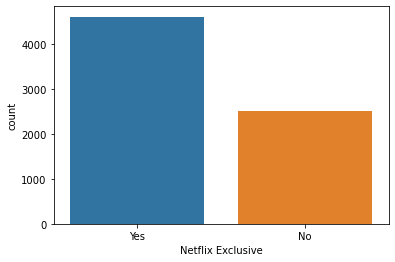

In [13]:
#Netflix excusive counts PLOT in days
sns.countplot(data=netflix,x=netflix['Netflix Exclusive'])

#save plot
plt.savefig('Netflix excusive counts PLOT in days.png',dpi=300,bbox_inches='tight')

In [14]:
##Netflix TITLES counts in days from the highest.
netflix['Title'].value_counts()

Cocomelon                     428
Ozark                          85
Cobra Kai                      81
Manifest                       80
The Queenâs Gambit           73
                             ... 
Dare Me                         1
Jojoâs Bizarre Adventure      1
The Lucky One                   1
Salt                            1
Christmas on the Square         1
Name: Title, Length: 645, dtype: int64

In [15]:
#Netflix TYPES counts in days
netflix['Type'].value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64

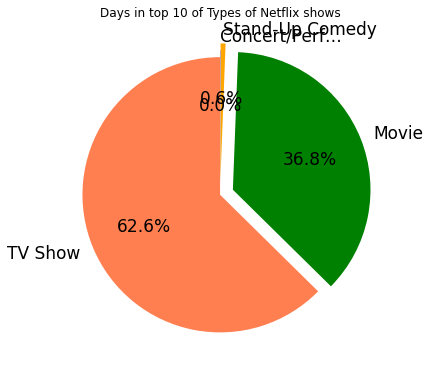

<Figure size 432x288 with 0 Axes>

In [16]:
#PIE for Netflix TYPEs counts in days
plt.figure(figsize=(6,6))
colors = ['coral','green','orange','blue']
plt.pie(netflix['Type'].value_counts(),
    labels=['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert/Perf…'],
    shadow=False,
    colors=colors,
    explode=(0.0, 0.1, 0.1, 0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 17})
plt.title('Days in top 10 of Types of Netflix shows')
plt.tight_layout()
plt.show()

plt.savefig('PIE for Netflix TYPEs counts in days.png',dpi=300,bbox_inches='tight')

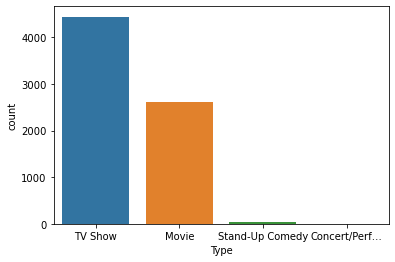

In [17]:
#COUNT plot for Netflix TYPEs counts in days
sns.countplot(data=netflix,x=netflix['Type'])

plt.savefig('COUNT plot for Netflix TYPEs counts in days.png',dpi=300,bbox_inches='tight')

In [18]:
#Analysing the TV SHOW if Netflix_Exclusive shows performs better than non Netflix_Exclusive shows
ecl_TVShow=netflix[netflix['Type']=='TV Show'].groupby(netflix['Title']).max()
ecl_TVShow=ecl_TVShow.sort_values(by='Days In Top 10',ascending=False)
TVShow_report = ecl_TVShow.groupby(['Netflix Exclusive']).count()
TVShow_report['percentage'] = (TVShow_report['Days In Top 10']/TVShow_report['Days In Top 10'].sum())*100
TVShow_report[['Days In Top 10','percentage']]

,Days In Top 10,percentage
Netflix Exclusive,,
No,61,21.55477
Yes,222,78.44523


In [ ]:
#PIE chart for TV Shows Netflix exclusive performance
plt.figure(figsize=(6,6))
colors = ['coral','green']
plt.pie(TVShow_report[['Days In Top 10','percentage']]['Days In Top 10'],
    labels=['No', 'Yes'],
    shadow=False,
    colors=colors,
    explode=(0.0, 0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 20})
plt.title('TV SHOWS Netflic Exclusive performance')
plt.tight_layout()
plt.show()

#save pie
plt.savefig('PIE chart for TV Shows Netflix exclusive performance.png',dpi=300,bbox_inches='tight')

In [ ]:
#Analysing the MOVIE if Netflix_Exclusive shows performs better than non Netflix_Exclusive shows
ecl_movie=netflix[netflix['Type']=='Movie'].groupby(netflix['Title']).max()
ecl_movie=ecl_movie.sort_values(by='Days In Top 10',ascending=False)
movie_report = ecl_movie.groupby(['Netflix Exclusive']).count()
movie_report['percentage'] = (movie_report['Days In Top 10']/movie_report['Days In Top 10'].sum())*100
movie_report[['Days In Top 10','percentage']]

In [ ]:
#Analysing the Concerts if Netflix_Exclusive shows performs better than non Netflix_Exclusive shows
ecl_concert=netflix[netflix['Type']=='Concert/Perf…'].groupby(netflix['Title']).max()
ecl_concert=ecl_concert.sort_values(by='Days In Top 10',ascending=False)
Concert_report = ecl_concert.groupby(['Netflix Exclusive']).count()
Concert_report['percentage'] = (Concert_report['Days In Top 10']/Concert_report['Days In Top 10'].sum())*100
Concert_report[['Days In Top 10','percentage']]

In [ ]:
#Analysing the Stand-Up Comedy if Netflix_Exclusive shows performs better than non Netflix_Exclusive shows
ecl_tvshow=netflix[netflix['Type']=='Stand-Up Comedy'].groupby(netflix['Title']).max()
ecl_tvshow=ecl_tvshow.sort_values(by='Days In Top 10',ascending=False)
stand_up_report = ecl_tvshow.groupby(['Netflix Exclusive']).count()
stand_up_report['percentage'] = (stand_up_report['Days In Top 10']/stand_up_report['Days In Top 10'].sum())*100
stand_up_report[['Days In Top 10','percentage']]

In [ ]:
#Each type and maximum number of days at the top.
table = pd.pivot_table(data=netflix,index='Type',values='Days In Top 10',aggfunc=np.max)
pd.DataFrame(table)

In [ ]:
#Netflix Types and maximum days in top 10#
table.plot(kind='bar', figsize=(10,5), stacked=False)
plt.xlabel('Type', fontdict={'fontsize':20})
plt.ylabel('Days in top 10', fontdict={'fontsize':20})
plt.title('Netflix Types and maximum days in top 10', fontdict={'fontsize':20})

plt.savefig('Maximum days each type got to the top.png',dpi=300,bbox_inches='tight')

In [ ]:
#Top 10 shows on netflix
xy=netflix['Title'].value_counts()[:10]
xy

In [ ]:
#TV Show-Unwell data
unwell_show=netflix[netflix['Title']=='(Un)Well']
unwell_show

In [ ]:
#Barchart for TV Show-Unwell data
plt.bar(unwell_show['Days In Top 10'], unwell_show['Viewership Score'])
plt.xlabel('Days in top 10')
plt.ylabel('Viewership scores')
plt.title('(Un)well tv show days in top 10 vs each day viewership scores ')

plt.savefig('Barchart for TV Show-Unwell data.png',dpi=300,bbox_inches='tight')

In [ ]:
#title:Ozark-TV Show data
Ozark=netflix[netflix['Title']=='Ozark']
Ozark

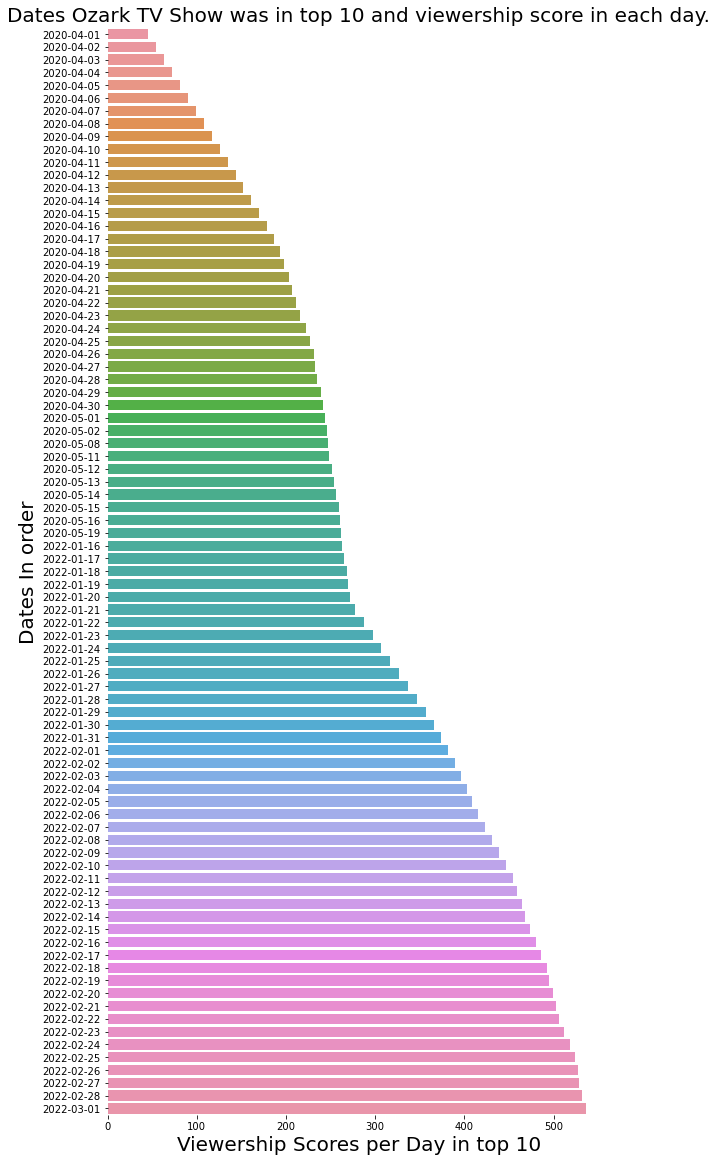

In [29]:
#Bar plot for Title:Ozark-TV Show data
fig=plt.figure(figsize=(9,20))
plt.title('Dates Ozark TV Show was in top 10 and viewership score in each day.',fontdict={'fontsize':20})
sns.barplot(y=Ozark['As of'], x=Ozark['Viewership Score'], data=Ozark)
plt.xlabel('Viewership Scores per Day in top 10',fontdict={'fontsize':20})
plt.ylabel('Dates In order',fontdict={'fontsize':20})
sns.despine(bottom = True, left = True);

#save plot
plt.savefig('Bar plot for Title:Ozark-TV Show data.png',dpi=300,bbox_inches='tight')

In [30]:
#CONCERTS TYPE DATA
netflix[netflix['Type']=='Concert/Perf…']


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2651,2020-12-22,2,0,0,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,"Dec 21, 2020",1,9
2664,2020-12-23,5,2,0,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,"Dec 21, 2020",2,15


In [31]:
#Stand-by comedies and days in top 10
comedy=netflix[netflix['Type']=='Stand-Up Comedy'].groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False)
comedy

Title
Dave Chappelle: The Closer        16
Kevin Hart: Zero F**ks Given      10
Jerry Seinfeld: 23 Hours to…       5
George Lopez: Weâll Do It f…     5
Chris DâElia: No Pain            3
Bo Burnham: Inside                 2
Name: Days In Top 10, dtype: int64

C:\Users\EDWIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\EDWIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\EDWIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\EDWIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


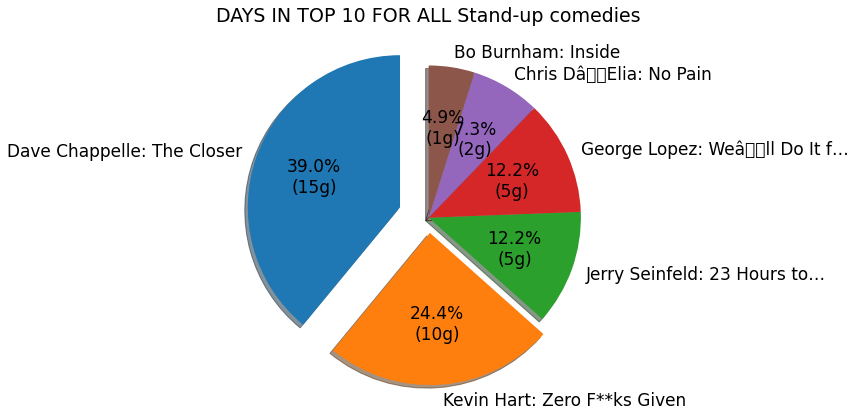

In [32]:
#pie plot -Stand-by comedies and days in top 10
fig=plt.figure(figsize=(7,7))
myexplode=[0.2,0.1,0,0,0,0]
def func(pct, allvalues):
    absolute=int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d}g)".format(pct, absolute)
figsize=(100,102)
plt.pie(comedy, labels=comedy.keys(), 
        autopct=lambda pct:func(pct, comedy),
        startangle=90,
        textprops={'fontsize': 17},
       explode=myexplode,
       shadow=True)
plt.title('DAYS IN TOP 10 FOR ALL Stand-up comedies', fontdict={'fontsize':19})

#save plot
plt.savefig('pie plot -Stand-by comedies and days in top 10.png',dpi=300,bbox_inches='tight')

In [33]:
#Movies and their maximun days in top 10
movies_Dayscount=netflix[netflix['Type']=='Movie'].groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False)
movies_Dayscount

Title
The Mitchells vs. The Machines    31
How the Grinch Stole Christmas    29
Vivo                              29
365 Days                          28
Despicable Me 2                   27
                                  ..
Scary Stories to Tell in th…       1
The Secret Life of Pets 2          1
Salt                               1
Are We There Yet?                  1
Animals on the Loose: A You…       1
Name: Days In Top 10, Length: 355, dtype: int64

In [34]:
#TV Shows and their maximun days in top 10
tv_shows=netflix[netflix['Type']=='TV Show'].groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False)[:10]
tv_shows

Title
Cocomelon               428
Ozark                    89
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             66
Bridgerton               58
Lucifer                  57
Name: Days In Top 10, dtype: int64

In [35]:
#MAXIMUM VIEWERSHIP SCORE FOR NETFLIX EXCLUSIVE
x=netflix[netflix['Netflix Exclusive'] == 'Yes']['Viewership Score'].max()
netflix[netflix['Viewership Score'] == x]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6996,2022-03-01,7,7,8,Ozark,TV Show,Yes,"Jul 21, 2017",89,536


In [36]:
#TOP TILES WITHMAXIMUM DAYS IN TOP 10 SCORE FOR NETFLIX EXCLUSIVE
x=netflix[netflix['Netflix Exclusive'] == 'Yes']['Days In Top 10'].max()
netflix[netflix['Days In Top 10'] == x]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2755,2021-01-01,6,5,6,Cocomelon,TV Show,No,"Jun 1, 2020",89,259
6996,2022-03-01,7,7,8,Ozark,TV Show,Yes,"Jul 21, 2017",89,536


In [37]:
#TOP TV SHOWS FOR MAXIMUM DAYS IN TOP 10  FOR TV SHOWS
x=netflix[netflix['Type'] == 'TV Show']['Days In Top 10'].max()
netflix[netflix['Days In Top 10'] == x]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,0,0,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474


In [38]:
#TOP TV SHOW WITH MAXIMUM VIEWERSHIP SCORE FOR TV SHOWS
xt=netflix[netflix['Type'] == 'TV Show']['Viewership Score'].max()
netflix[netflix['Viewership Score'] == xt]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,0,0,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474


In [39]:
#TOP MOVIE WITH ITS MAXIMUM DAYS IN TOP 10 FOR MOVIES
netflix[netflix['Type'] == 'Movie'].max()

As of                    2022-03-11
Rank                             10
Year to Date Rank                10
Last Week Rank                   10
Title                     Zookeeper
Type                          Movie
Netflix Exclusive               Yes
Netflix Release Date    Sep 9, 2020
Days In Top 10                   31
Viewership Score                213
dtype: object

In [40]:
#TOP TV SHOW WITH MAXIMUM VIEWERSHIP SCORE IN TV SHOWS
x=netflix[netflix['Type'] == 'TV Show']['Viewership Score'].max()
netflix[netflix['Viewership Score'] == x]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,0,0,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474


C:\Users\EDWIN\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


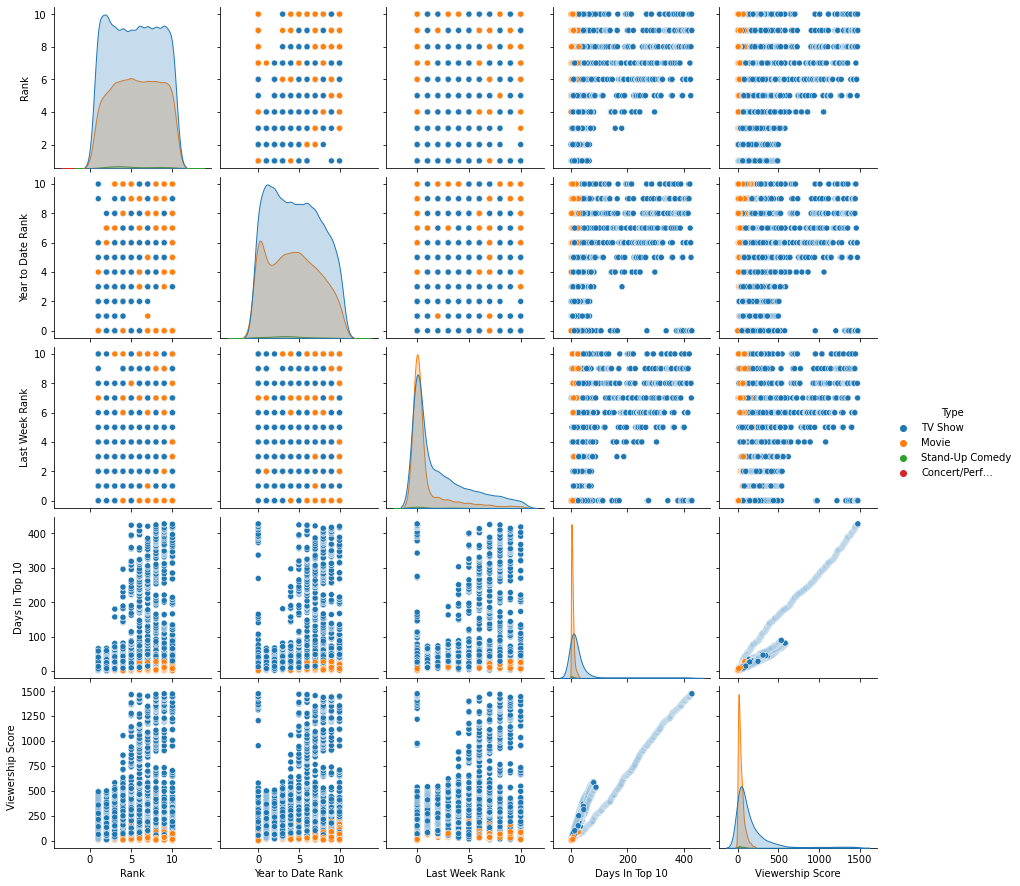

In [41]:
#PAIRPLOT
sns.pairplot(netflix, hue='Type')

#save plot
plt.savefig('pairplot for netflix data.png',dpi=300,bbox_inches='tight')

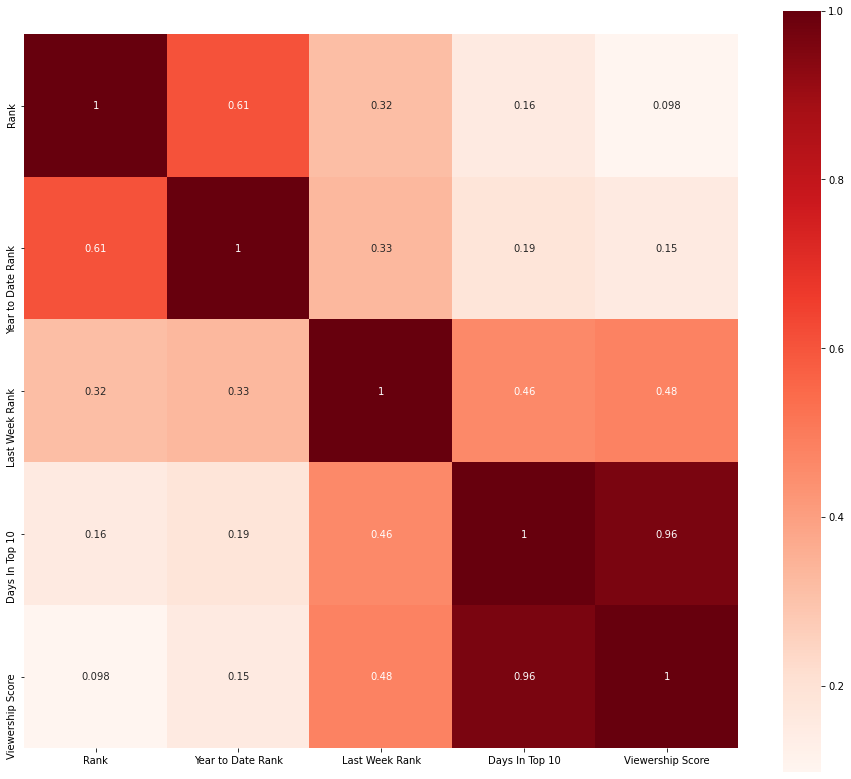

In [42]:
#HEAT MAP
plt.figure(figsize=(16,14))
sns.heatmap(netflix.corr(),annot=True, square=True, cmap='Reds')

#save plot
plt.savefig('HEATMAP FOR NETFLIX int data.png',dpi=300,bbox_inches='tight')

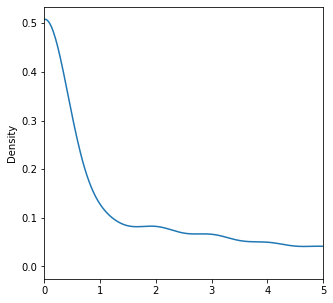

In [43]:
netflix['Last Week Rank'].plot(kind="density",
                     figsize=(5,5),
                     xlim=(0,5))
#save plot
plt.savefig('DENSITY PLOT FOR last week rank column .png',dpi=300,bbox_inches='tight')

# CONCLUSION

-Mean days in top 10 for the data is 24 days.

-Maximum days in top 10 is 428-Cocomelon TV Show.

-TV shows have a better chance of staying in the Top 10 than movies or stand-up comedy specials and concerts. This makes sense, since it takes longer to watch a season of a TV show. 

-Back in December of 2020,date 22 and 23, Ariana Grande's Excuse Me, I Love You spent two days in the Netflix Top 10.

-Dave Chappelle and Kevin Hart are the only two comedians to stay in the Netflix Top 10 for ten or more days in the past two years.

-'Cocomelon' for young children spent 428 days in the Netflix Top 10 over the past two years, beating out 'Ozark', which spent 89 days in the Top 10.

-'Mitchells vs The Machines' is the only movie that had more than 30 days in top 10 (31 days).

-Netflix Exclusive performs best in Tv shows category.

-Netflix Exclusive performs best in movies category.

-There are no non netflix exclusive Stand-up comedy shows.

-Cocomelon TV Show has the maximum days in top 10 for the two years-428, followed by 'Ozark'.

-Cocomelon TV Show has the vieweship score 10 for the two years-1478.

-The correlation between Days in top 10 and viewerscore is high=0.96.